In [1]:
from skimage.segmentation import felzenszwalb
import cv2,numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = 'C:\\Users\\MASOUD\\Pictures\\cars\\drone.jpg'

In [3]:
# Step 1: Read the image
image = cv2.imread(path)

# Step 2: Convert to CIELAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# Step 3: Split the LAB image into L, A, and B channels
L, A, B = cv2.split(lab_image)

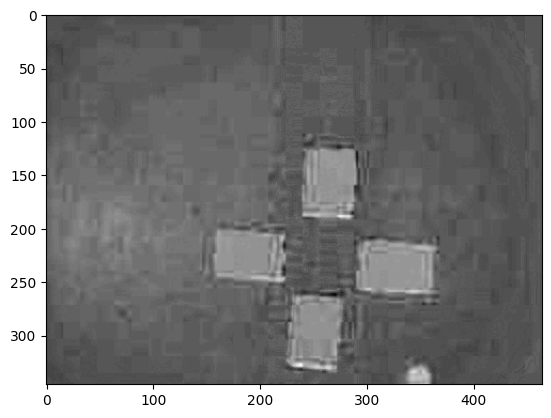

In [4]:
plt.imshow(A,cmap='gray')

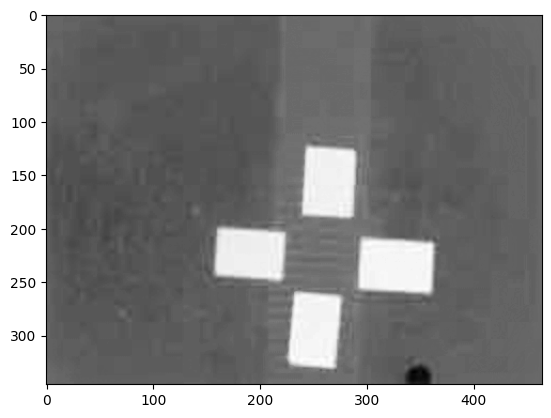

In [5]:
plt.imshow(B,cmap='gray')

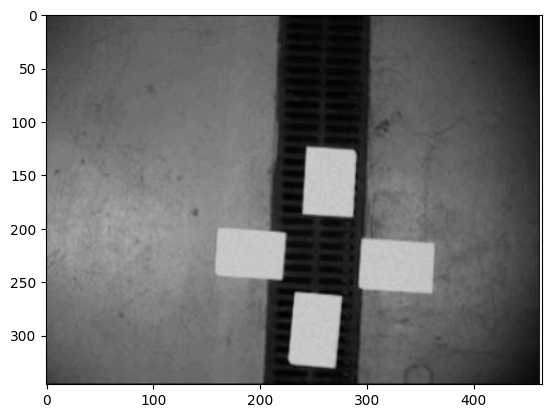

In [6]:
plt.imshow(L,cmap='gray')

### Image Segmentation Using ab* chromacity plane and KMeans clustering

In [8]:
ab = np.stack((A.flatten(),B.flatten()),axis=-1)
kmeans = cv2.kmeans(ab.astype(np.float32), 2, None, 
                    (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2), 10, 
                    cv2.KMEANS_RANDOM_CENTERS)[1]


In [9]:
labels = kmeans.reshape(A.shape)

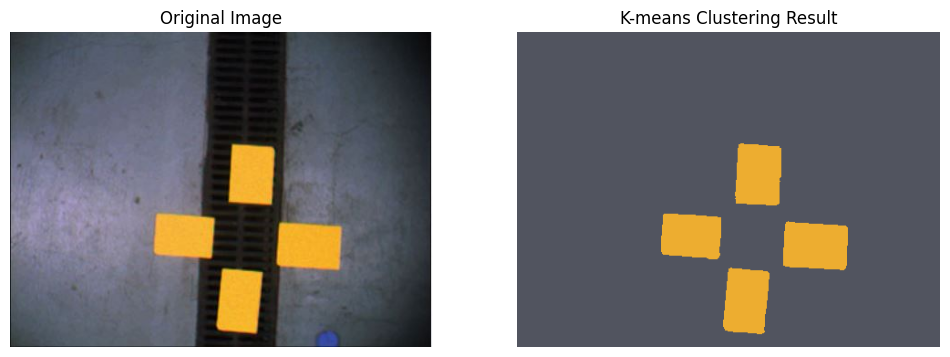

In [10]:
# Create an output image to visualize the clusters
output_image = np.zeros_like(image)
for i in range(2):
    output_image[labels == i] = np.mean(image[labels == i], axis=0)

# Display the original and clustered images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('K-means Clustering Result')
plt.axis('off')

plt.show()

In [7]:
one = np.array([1,2])
two = np.array([3,4])
np.stack((one,two),axis=-1)

array([[1, 3],
       [2, 4]])

### Semantic Segmentation using FCN-Resnet Deep Neural Network

In [9]:
import cv2
import torchvision as tv
import torch
import matplotlib.pyplot as plt
%matplotlib inline

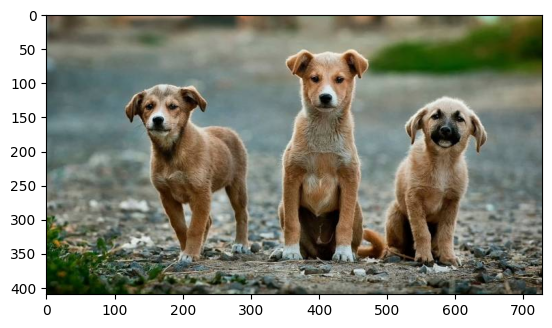

In [50]:
path = 'C:\\Users\\MASOUD\\Pictures\\c-vision\\10.jpg'
# Step 1: Read the image
image = cv2.imread(path)

# Step 2: Convert to CIELAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

plt.imshow(image[...,::-1])

In [51]:
image.shape

(410, 728, 3)

In [52]:
transforms = tv.transforms.Compose([
    tv.transforms.ToTensor(),
    tv.transforms.Normalize(mean=[.485,.481,.479],std=[.224,.263,.227])
])
in_tensor = transforms(image)

In [53]:
model = tv.models.segmentation.fcn_resnet50(weights=tv.models.segmentation.fcn.FCN_ResNet50_Weights).eval()
outputs = model(torch.stack([in_tensor]))

c:\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FCN_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [54]:
labels = torch.argmax(outputs["out"].squeeze(),dim=0).detach().cpu().numpy()

In [55]:
outputs['out'].squeeze().shape

torch.Size([21, 410, 728])

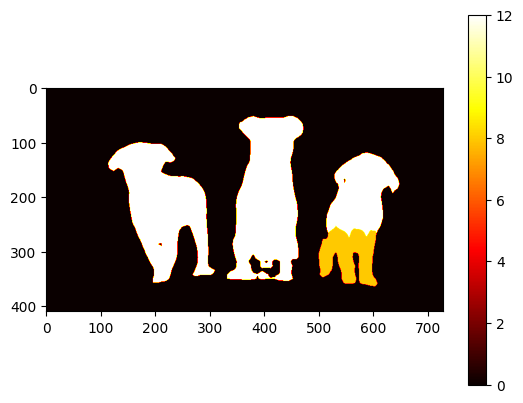

In [56]:
image = plt.imshow(labels,cmap='hot')
cbar = plt.colorbar(image)

### test against fcn 101

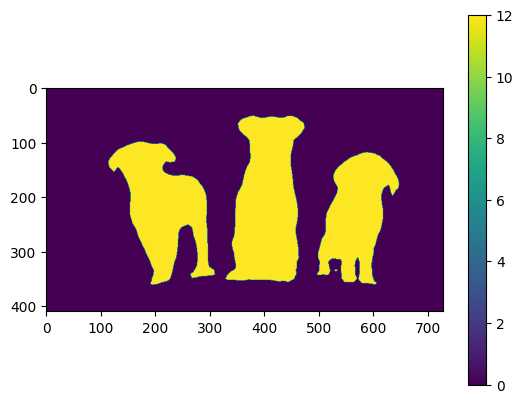

In [57]:
model_n = tv.models.segmentation.fcn_resnet101(weights=tv.models.segmentation.fcn.FCN_ResNet101_Weights).eval()
outputs = model_n(torch.stack([in_tensor]))
labels = torch.argmax(outputs["out"].squeeze(),dim=0).detach().cpu().numpy()
im_101 = plt.imshow(labels,cmap='viridis')
plt.colorbar(im_101)

## Pascal VOC classes
* background
* aeroplane
* bicycle
* bird
* boat
* bottle
* bus
* car
* cat
* chair
* cow
* diningtable
* dog
* horse
* motorbike
* person
* pottedplant
* sheep
* sofa
* train
* tvmonitor